In [79]:
! pip install pandas

In [80]:
#load the required librarires:
import pandas as pd
from matplotlib import pyplot as pyplot
import seaborn as sns
import numpy as np


In [81]:
df=pd.read_csv('laptop.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Data exploration and understanding

In [82]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


(1303, 13)

Data prepossesing

In [83]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True) #removing unnecessary columns
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [84]:
df.shape

(1303, 11)

Handling null values


In [85]:
df.isnull().sum()
df1=df.dropna()
df1.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


Feature engineering

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
df1['Inches'] = pd. to_numeric(df['Inches'],errors='coerce')
df1['Inches']

,Inches
0,13.3
1,13.3
2,15.6
3,15.4
4,13.3
...,...
1298,14.0
1299,13.3
1300,14.0
1301,15.6


In [88]:
df1['Ram'].value_counts()

,count
Ram,
8GB,601
4GB,367
16GB,194
6GB,40
12GB,25
2GB,22
32GB,17
64GB,3
24GB,3


In [89]:
df1["Ramsize"] = df1["Ram"].str.extract('(\d+)').astype(int)
df1["Ramsize"]

,Ramsize
0,8
1,8
2,8
3,16
4,8
...,...
1298,4
1299,16
1300,2
1301,6


In [90]:
df1["WeightValue"] = df1["Weight"].str.extract('(\d+)').astype(float)
df1['WeightValue']

,WeightValue
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1298,1.0
1299,1.0
1300,1.0
1301,2.0


In [91]:
df["Ram"]=df["Ram"].str.replace("GB","")
df["Weight"]=df["Weight"].str.replace("kg","")
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


**Distribution of price variable**

<Axes: xlabel='Price', ylabel='Density'>

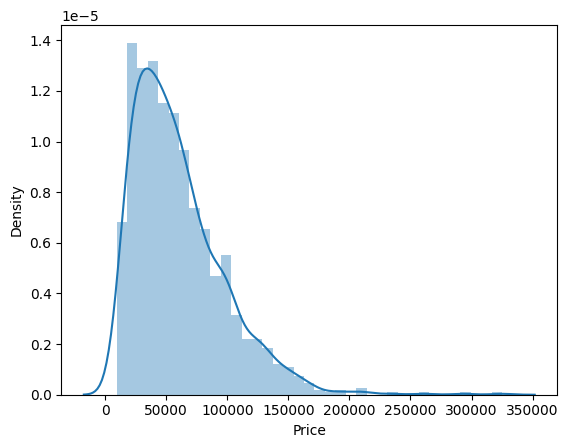

In [93]:
sns.distplot(df1['Price'])

**right skewed graph**

<Axes: xlabel='Company'>

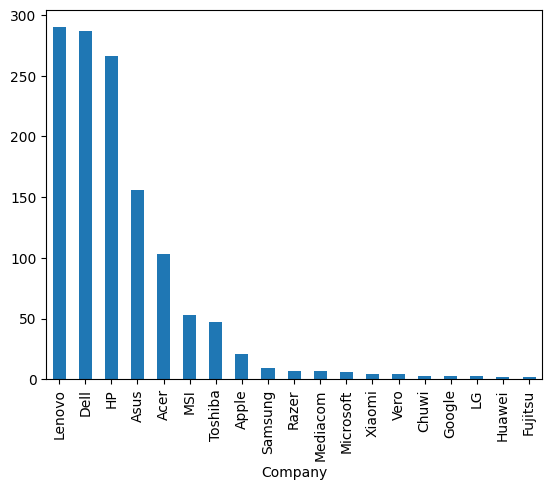

In [94]:
df1['Company'].value_counts().plot(kind='bar')

**Price with company**

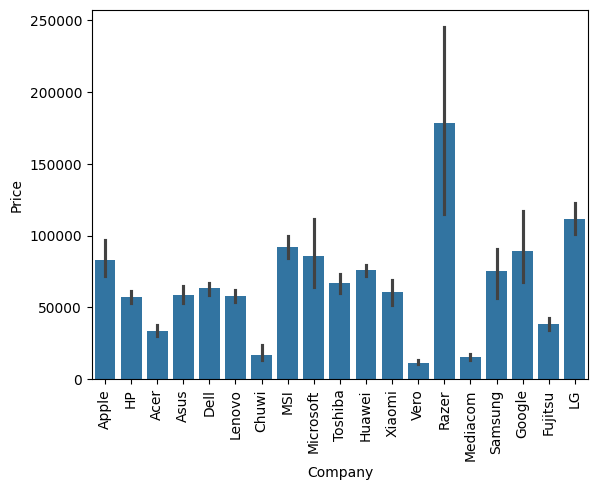

In [95]:
sns.barplot(x=df1['Company'],y=df1['Price'])
pyplot.xticks(rotation='vertical')
pyplot.show()

<Axes: xlabel='TypeName'>

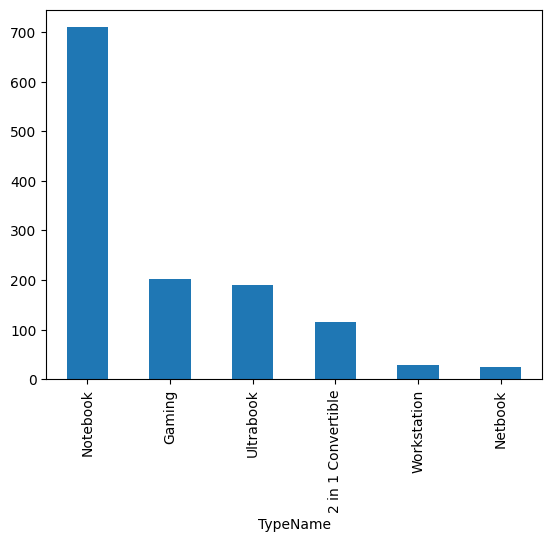

In [96]:
df1['TypeName'].value_counts().plot(kind='bar')

**Price with type name**                           

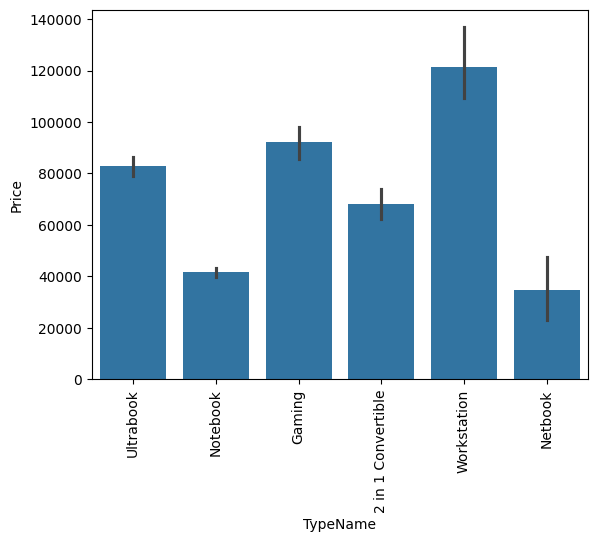

In [97]:
sns.barplot(x=df1["TypeName"],y=df1["Price"])
pyplot.xticks(rotation="vertical")
pyplot.show()

**Price with inches**


<Axes: xlabel='Inches', ylabel='Price'>

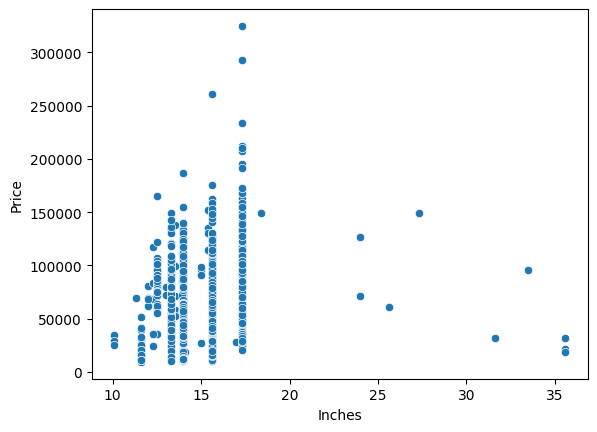

In [98]:
sns.scatterplot(x="Inches",y="Price",data=df1)

**Price with ram**

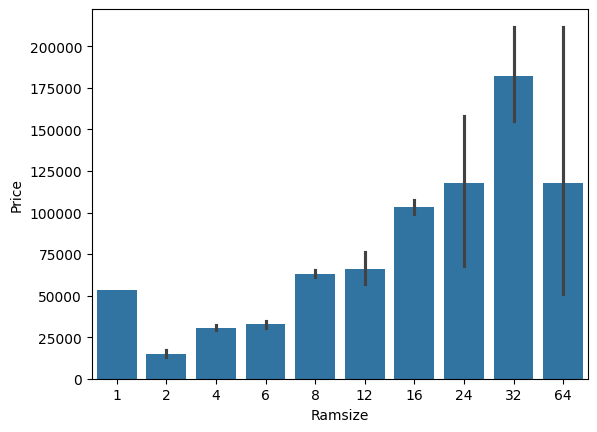

In [99]:
sns.barplot(x='Ramsize',y='Price',data=df1)
pyplot.show()


In [100]:
df1['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,495
1366x768,274
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,52
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


using lambda function to determine if screen resolution column any value has  named touch screen then it is represented as '1' else not touch screen then '0'

In [101]:
df1['Touchscreen']=df1['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df1.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0


<Axes: xlabel='Touchscreen'>

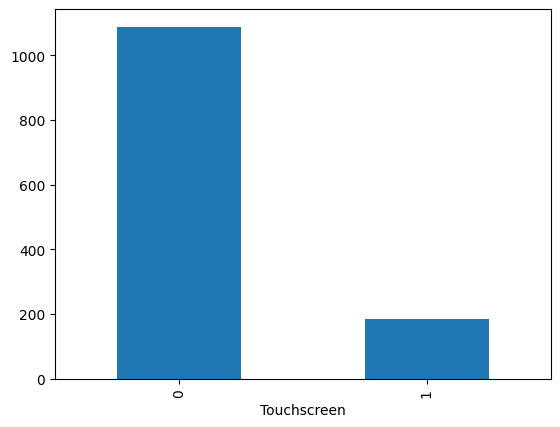

In [102]:
df1['Touchscreen'].value_counts().plot(kind='bar')


price with touch screen

<Axes: xlabel='Touchscreen', ylabel='Price'>

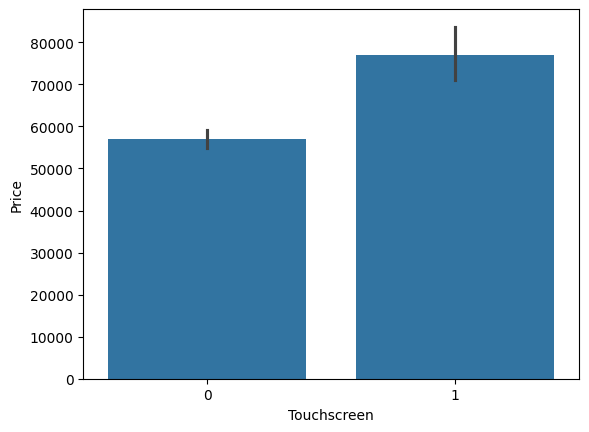

In [103]:
sns.barplot(x=df1['Touchscreen'],y=df1['Price'])

In [104]:
df1['IPS']=df1['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df1.head(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0,1
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000,4,2.0,0,0


<Axes: xlabel='IPS'>

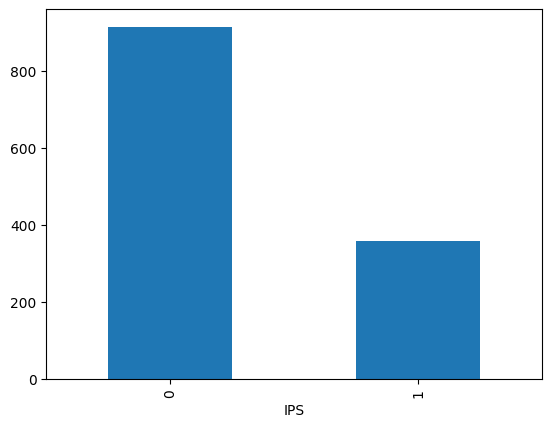

In [105]:
df1['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

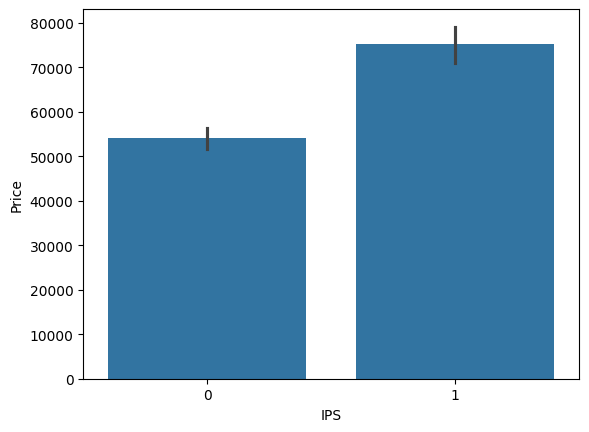

In [106]:
sns.barplot(x=df1['IPS'],y=df1['Price'])

In [107]:
new = df1['ScreenResolution'].str.split('x',n=1,expand=True)
df1['X_res'] = new[0]
df1['Y_res'] = new[1]
df1.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0,1,IPS Panel Retina Display 2560,1600


In [108]:
df1['X_res'] = df1['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df1.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,X_res,Y_res
1296,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.520,2,1.0,0,0,1366,768
333,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows 10,1.85kg,23922.720,4,1.0,0,0,1920,1080
1071,HP,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.31kg,63882.720,4,2.0,0,0,1366,768
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.336,16,1.0,0,1,2880,1800
743,Lenovo,2 in 1 Convertible,14.0,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.7kg,53226.720,8,1.0,1,0,1920,1080


In [109]:
df1['X_res'] = df1['X_res'].astype('int')
df1['Y_res'] = df1['Y_res'].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
 11  Ramsize           1273 non-null   int64  
 12  WeightValue       1272 non-null   float64
 13  Touchscreen       1273 non-null   int64  
 14  IPS               1273 non-null   int64  
 15  X_res             1273 non-null   int64  
 16  Y_res             1273 non-null   int64  
dtype

In [110]:

numeric_df = df1.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
price_correlation = correlation_matrix['Price']

print(price_correlation)

Inches         0.044681
Price          1.000000
Ramsize        0.685648
WeightValue    0.146360
Touchscreen    0.188994
IPS            0.254851
X_res          0.557556
Y_res          0.554069
Name: Price, dtype: float64


In [111]:
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')


#((df1['X_res']**2)  (df1['Y_res']**2))**0.5/df1['Inches']


#df1.corr()['Price']


df1['Resolution'] = df1['ScreenResolution'].str.extract('(\d{3,4}x\d{3,4})')


df1['Resolution']


,Resolution
0,2560x1600
1,1440x900
2,1920x1080
3,2880x1800
4,2560x1600
...,...
1298,1920x1080
1299,3200x1800
1300,1366x768
1301,1366x768


In [112]:
res=df1['Resolution'].str.split('x',n=1,expand=True)
df1['X_res']=res[0]
df1['Y_res']=res[1]
df1.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,X_res,Y_res,Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0,1,2560,1600,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0,0,1440,900,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0,0,1920,1080,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0,1,2880,1800,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0,1,2560,1600,2560x1600


In [113]:
df1['X_res']=df1['X_res'].astype('int')
df1['Y_res']=df1['Y_res'].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
 11  Ramsize           1273 non-null   int64  
 12  WeightValue       1272 non-null   float64
 13  Touchscreen       1273 non-null   int64  
 14  IPS               1273 non-null   int64  
 15  X_res             1273 non-null   int64  
 16  Y_res             1273 non-null   int64  
 17  

In [114]:
if 'ScreenResolution' in df1.columns:
    df1.drop(columns=['ScreenResolution'], inplace=True)
else:
  0
#print("Column 'ScreenResolution' not found ")
df1.drop(columns=['ScreenResolution'], inplace=True, errors='ignore')
print(df1.columns)

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'Ramsize', 'WeightValue', 'Touchscreen', 'IPS',
       'X_res', 'Y_res', 'Resolution'],
      dtype='object')


In [115]:
df1.head()


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,X_res,Y_res,Resolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0,1,2560,1600,2560x1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0,0,1440,900,1440x900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0,0,1920,1080,1920x1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0,1,2880,1800,2880x1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0,1,2560,1600,2560x1600


In [116]:
res=df1['Resolution'].str.split('x',n=1,expand=True)
df1['X_res']=res[0]
df1['Y_res']=res[1]
df1.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,X_res,Y_res,Resolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0,1,2560,1600,2560x1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0,0,1440,900,1440x900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0,0,1920,1080,1920x1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0,1,2880,1800,2880x1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0,1,2560,1600,2560x1600


In [117]:
df1['X_res']=df1['X_res'].astype('int')
df1['Y_res']=df1['Y_res'].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Inches       1272 non-null   float64
 3   Cpu          1273 non-null   object 
 4   Ram          1273 non-null   object 
 5   Memory       1273 non-null   object 
 6   Gpu          1273 non-null   object 
 7   OpSys        1273 non-null   object 
 8   Weight       1273 non-null   object 
 9   Price        1273 non-null   float64
 10  Ramsize      1273 non-null   int64  
 11  WeightValue  1272 non-null   float64
 12  Touchscreen  1273 non-null   int64  
 13  IPS          1273 non-null   int64  
 14  X_res        1273 non-null   int64  
 15  Y_res        1273 non-null   int64  
 16  Resolution   1273 non-null   object 
dtypes: float64(3), int64(5), object(9)
memory usage: 179.0+ KB


In [118]:
df1.drop(columns='Resolution',inplace=True)
df1.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0,1,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0,1,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0,1,2560,1600


In [119]:
df1['PPI']=((df1['X_res']**2)+(df1['Y_res']**2))**0.5/df1['Inches'].astype('float')
#calling the PPI value
df1['PPI']

,PPI
0,226.983005
1,127.677940
2,141.211998
3,220.534624
4,226.983005
...,...
1298,157.350512
1299,276.053530
1300,111.935204
1301,100.454670


In [120]:
df1.drop(columns=['Inches','X_res','Y_res'],inplace=True)
df1

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0,1,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,4,1.0,1,1,157.350512
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,16,1.0,1,1,276.053530
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,2,1.0,0,0,111.935204
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,6,2.0,0,0,100.454670


In [121]:
numerical_data = df1.select_dtypes(include=['number'])
numerical_data.corr()['Price']

,Price
Price,1.000000
Ramsize,0.685648
WeightValue,0.146360
Touchscreen,0.188994
IPS,0.254851
PPI,0.469417


In [122]:
df1['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,128
Intel Core i7 8550U 1.8GHz,72
Intel Core i5 8250U 1.6GHz,68
...,...
AMD A9-Series 9420 2.9GHz,1
Intel Core i7 2.2GHz,1
AMD A6-Series 7310 2GHz,1


In [123]:
df1['Cpu Name']=df1['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df1.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0,1,226.983005,Intel Core i5


In [124]:
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'
df1['Cpu brand']=df1['Cpu Name'].apply(fetch_processor)
df1.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,PPI,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

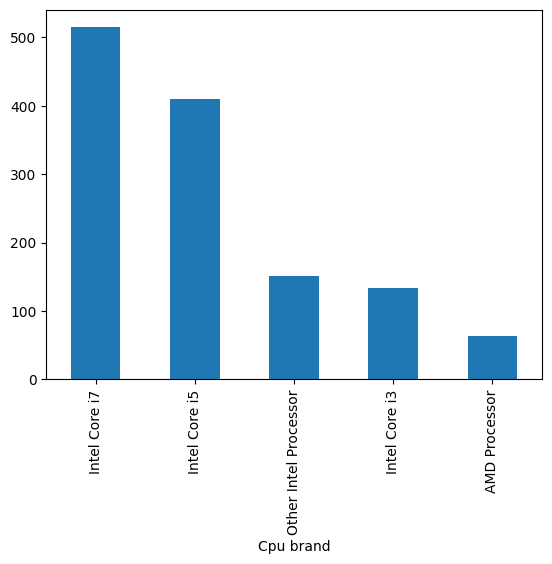

In [125]:
df1['Cpu brand'].value_counts().plot(kind='bar')

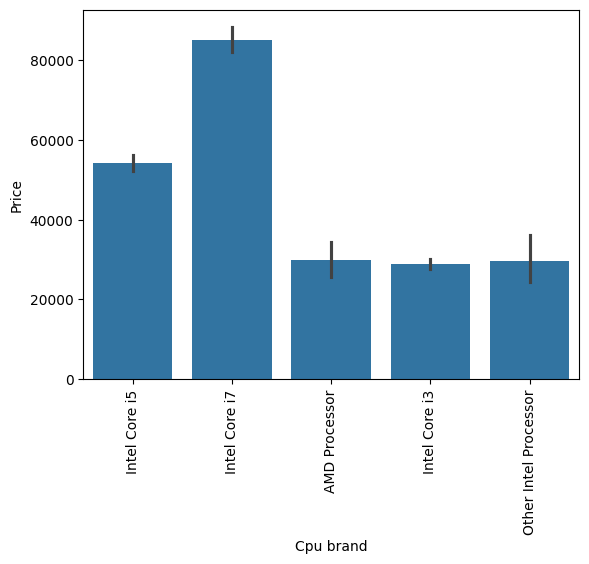

In [126]:
sns.barplot(x=df1['Cpu brand'],y=df1['Price'])
pyplot.xticks(rotation='vertical')
pyplot.show()

In [127]:
df1.drop(columns=["Cpu","Cpu Name"],inplace=True)


df1.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,PPI,Cpu brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0,0,127.677940,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0,1,226.983005,Intel Core i5


In [128]:
df1['Memory'].value_counts()

,count
Memory,
256GB SSD,401
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [129]:
import pandas as pd
import numpy as np
# Convert 'Memory' column to string and remove '.0'
df1['Memory'] = df1['Memory'].astype(str).replace('\.0', '', regex=True)
df1['Memory'] = df1['Memory'].str.replace('GB', '')
df1['Memory'] = df1['Memory'].str.replace('TB', '000')
# Split the 'Memory' column
new = df1['Memory'].str.split("+", n=1, expand=True)
df1['first'] = new[0].str.strip()
df1['second'] = new[1]
# Create indicator columns for storage types
storage_types = ['HDD', 'SSD', 'Hybrid', 'Flash Storage']
for storage in storage_types:
    df1[f'Layer1{storage.replace(" ", "_")}'] = df1['first'].str.contains(storage, case=False, na=False).astype(int)
# Remove non-digit characters from 'first' column
df1['first'] = df1['first'].str.replace(r'\D', '', regex=True)
df1['second'] = df1['second'].fillna("0")
for storage in storage_types:
    df1[f'Layer2{storage.replace(" ", "_")}'] = df1['second'].str.contains(storage, case=False, na=False).astype(int)
# Remove non-digit characters from 'second' column
df1['second'] = df1['second'].str.replace(r'\D', '', regex=True)
# Convert to integer, replacing empty strings with 0
df1['first'] = pd.to_numeric(df1['first'], errors='coerce').fillna(0).astype(int)
df1['second'] = pd.to_numeric(df1['second'], errors='coerce').fillna(0).astype(int)
# Calculate storage capacities
for storage in storage_types:
    storage_col = storage.replace(" ", "_")
    df1[storage_col] = (df1['first'] * df1[f'Layer1{storage_col}'] +
                        df1['second'] * df1[f'Layer2{storage_col}'])
# Drop intermediate columns
columns_to_drop = (['first', 'second'] +
                   [f'Layer1{s.replace(" ", "_")}' for s in storage_types] +
                   [f'Layer2{s.replace(" ", "_")}' for s in storage_types])
df1.drop(columns=columns_to_drop, inplace=True)
df1.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8GB,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8GB,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8GB,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16GB,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8GB,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0,1,226.983005,Intel Core i5,0,256,0,0


In [130]:
numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df1[numeric_cols].corr()
print(corr_matrix['Price'])

Price            1.000000
Ramsize          0.685648
WeightValue      0.146360
Touchscreen      0.188994
IPS              0.254851
PPI              0.469417
HDD             -0.095394
SSD              0.668416
Hybrid           0.007843
Flash_Storage   -0.038332
Name: Price, dtype: float64


In [131]:
df1.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df1.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8GB,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8GB,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8GB,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16GB,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8GB,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0,1,226.983005,Intel Core i5,0,256


In [132]:
df1['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,271
Intel HD Graphics 520,181
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [133]:
df1['Gpu brand'] = df1['Gpu'].apply(lambda x: x.split()[0])
df1.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8GB,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.0,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8GB,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.0,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8GB,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.0,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16GB,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.0,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8GB,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.0,0,1,226.983005,Intel Core i5,0,256,Intel


In [134]:
df1['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,703
Nvidia,393
AMD,176
ARM,1


In [135]:
df1[df1['Gpu brand'] == 'ARM']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
1191,Samsung,2 in 1 Convertible,4GB,32 Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,35111.52,4,1.0,1,1,234.5074,AMD Processor,0,0,ARM


In [136]:
df1 = df1[df1['Gpu brand'] != 'ARM']
df1['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,703
Nvidia,393
AMD,176


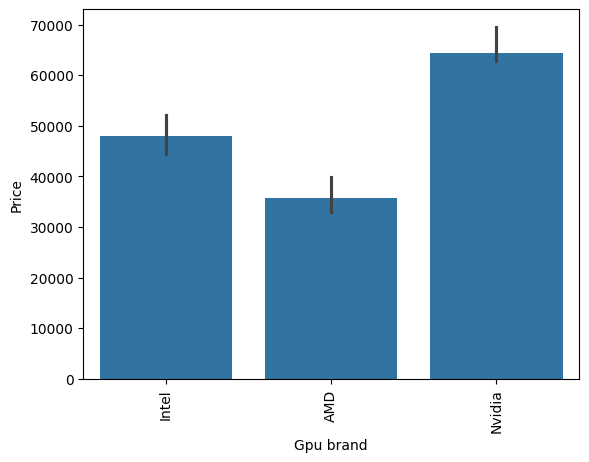

In [137]:
import seaborn as sns
sns.barplot(x=df1['Gpu brand'],y=df1['Price'],estimator=np.median)
pyplot.xticks(rotation='vertical')
pyplot.show()

In [138]:
df1.drop(columns=['Gpu'],inplace=True)
df1.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8GB,128 SSD,macOS,1.37kg,71378.6832,8,1.0,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8GB,128 Flash Storage,macOS,1.34kg,47895.5232,8,1.0,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8GB,256 SSD,No OS,1.86kg,30636.0000,8,1.0,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16GB,512 SSD,macOS,1.83kg,135195.3360,16,1.0,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8GB,256 SSD,macOS,1.37kg,96095.8080,8,1.0,0,1,226.983005,Intel Core i5,0,256,Intel


In [139]:
df1['OpSys'].value_counts()

,count
OpSys,
Windows 10,1047
No OS,63
Linux,61
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


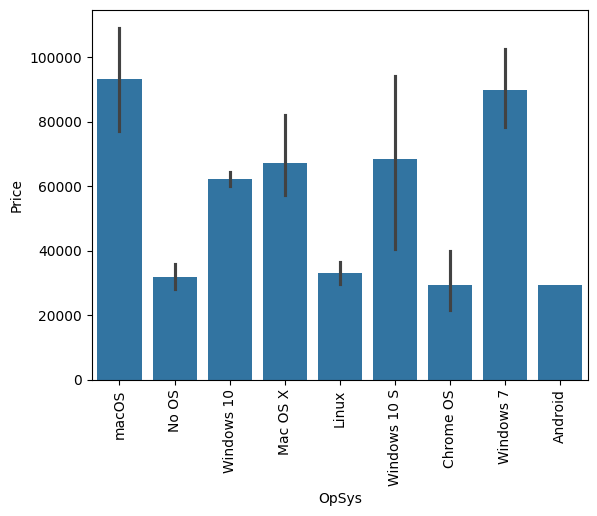

In [140]:
sns.barplot(x=df1['OpSys'],y=df1['Price'])
pyplot.xticks(rotation='vertical')
pyplot.show()

In [141]:

def cat_os(inp):
  if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
    return 'Windows'
  elif inp == 'macOS' or inp == 'Mac OS X':
    return 'Mac'
  else:
    return 'Others/NO OS/Linux'


df1['os'] = df1['OpSys'].apply(cat_os)
df1.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Ramsize,WeightValue,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8GB,128 SSD,macOS,1.37kg,71378.6832,8,1.0,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8GB,128 Flash Storage,macOS,1.34kg,47895.5232,8,1.0,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8GB,256 SSD,No OS,1.86kg,30636.0000,8,1.0,0,0,141.211998,Intel Core i5,0,256,Intel,Others/NO OS/Linux
3,Apple,Ultrabook,16GB,512 SSD,macOS,1.83kg,135195.3360,16,1.0,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8GB,256 SSD,macOS,1.37kg,96095.8080,8,1.0,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


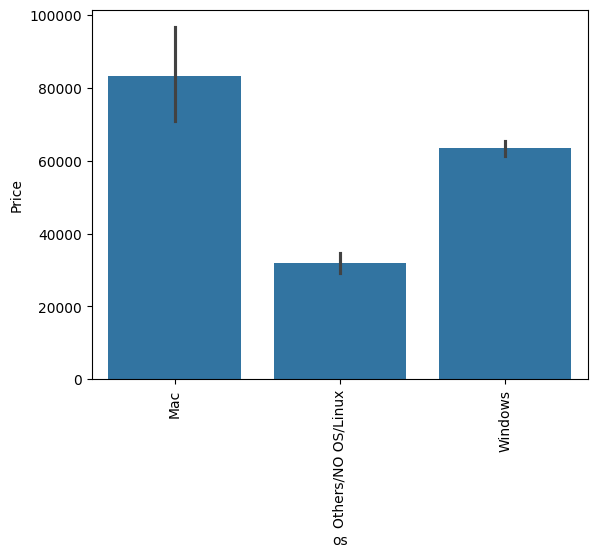

In [142]:
df1.drop(columns=['OpSys'],inplace=True)


sns.barplot(x=df1['os'],y=df1['Price'])
pyplot.xticks(rotation='vertical')
pyplot.show()

<Axes: xlabel='WeightValue', ylabel='Density'>

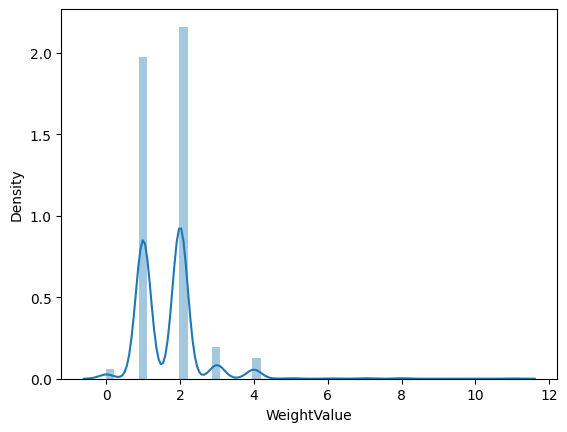

In [143]:
sns.distplot(df1['WeightValue'])

<Axes: xlabel='WeightValue', ylabel='Price'>

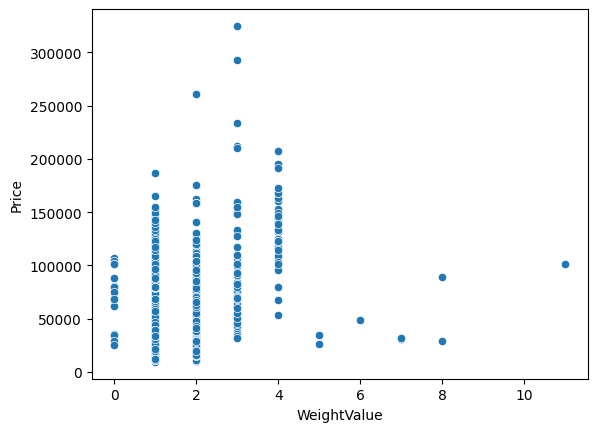

In [144]:
sns.scatterplot(x=df1['WeightValue'],y=df1['Price'])

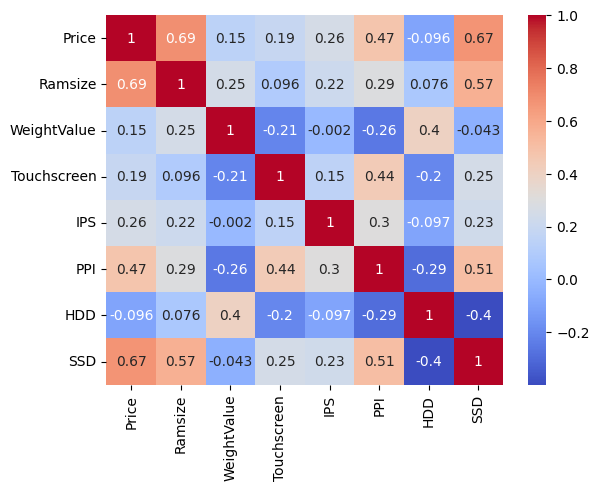

In [145]:

numerical_data = df1.select_dtypes(include=['number'])


correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
#plt.title('Heatmap of Numerical Data')
pyplot.show()

In [146]:
corr_matrix = df1.corr(numeric_only=True)
print(corr_matrix['Price'])

Price          1.000000
Ramsize        0.685521
WeightValue    0.146008
Touchscreen    0.190738
IPS            0.255987
PPI            0.471335
HDD           -0.095855
SSD            0.668271
Name: Price, dtype: float64


<Axes: xlabel='Price', ylabel='Density'>

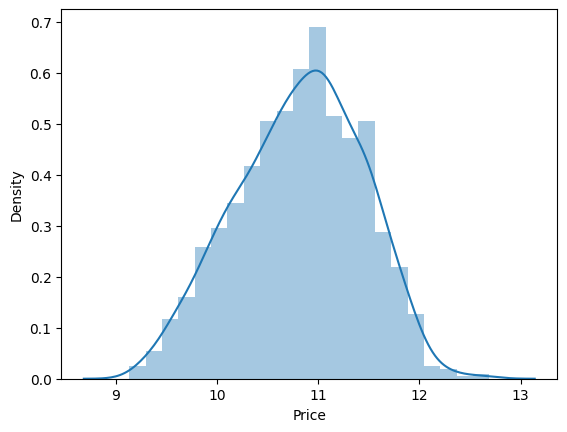

In [147]:
sns.distplot(np.log(df1['Price']))

**Model selection for training and testing the data set**

In [148]:
X = df1.drop(columns=['Price'])
y = np.log(df1['Price'])

In [149]:
X

,Company,TypeName,Ram,Memory,Weight,Ramsize,WeightValue,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8GB,128 SSD,1.37kg,8,1.0,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8GB,128 Flash Storage,1.34kg,8,1.0,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8GB,256 SSD,1.86kg,8,1.0,0,0,141.211998,Intel Core i5,0,256,Intel,Others/NO OS/Linux
3,Apple,Ultrabook,16GB,512 SSD,1.83kg,16,1.0,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8GB,256 SSD,1.37kg,8,1.0,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4GB,128 SSD,1.8kg,4,1.0,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16GB,512 SSD,1.3kg,16,1.0,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2GB,64 Flash Storage,1.5kg,2,1.0,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6GB,1000 HDD,2.19kg,6,2.0,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [150]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)


X_train

,Company,TypeName,Ram,Memory,Weight,Ramsize,WeightValue,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,os
734,Lenovo,Notebook,8GB,256 SSD,1.44kg,8,1.0,0,1,165.632118,Intel Core i5,0,256,Intel,Windows
22,HP,Notebook,4GB,500 HDD,1.86kg,4,1.0,0,0,100.454670,AMD Processor,500,0,AMD,Others/NO OS/Linux
810,HP,Gaming,12GB,1000 HDD,3.74kg,12,3.0,0,1,127.335675,Intel Core i7,1000,0,AMD,Windows
282,Lenovo,Gaming,8GB,256 SSD,2.5kg,8,2.0,0,1,141.211998,Intel Core i5,0,256,Nvidia,Windows
764,Dell,Notebook,4GB,500 HDD,1.65kg,4,1.0,0,0,117.826530,Intel Core i3,500,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Lenovo,Notebook,8GB,180 SSD,1.7kg,8,1.0,0,0,157.350512,Intel Core i5,0,180,Intel,Windows
308,Lenovo,Notebook,8GB,128 SSD + 1000 HDD,2.3kg,8,2.0,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
505,Lenovo,Notebook,8GB,256 SSD,1.44kg,8,1.0,0,0,165.632118,Intel Core i5,0,256,Intel,Windows
539,Lenovo,Notebook,8GB,256 SSD,1.87kg,8,1.0,0,1,157.350512,Intel Core i7,0,256,Nvidia,Windows


In [152]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [153]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [154]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Assuming X_train is a pandas DataFrame
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
        ]), categorical_features),
    ])

# Create pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.6994400080575973
MAE 0.21991640000200818


**Decison tree **

In [155]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor  # Add this import
from sklearn.metrics import r2_score, mean_absolute_error

# ... (previous code remains the same)

# Create pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=8))  # Corrected line
])
# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.7271093102202277
MAE 0.22127540287864939


**Random forest  **


In [170]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor  # Add this import
from sklearn.metrics import r2_score, mean_absolute_error

# ... (previous code remains the same)
# Assuming X_train is a pandas DataFrame
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
        ]), categorical_features),
    ])

# Create pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100,
                                        random_state=3,
                                        max_samples=0.5,
                                        max_features=0.75,
                                        max_depth=15))
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8293152812668367
MAE 0.18024091250299176


**Linear regression**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression  # Import Linear Regression
from sklearn.metrics import r2_score, mean_absolute_error

# Assuming X_train is a pandas DataFrame
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
        ]), categorical_features),
    ])

# Create pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Use Linear Regression
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


**ADA BOOST**

In [158]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor  # Add this import
from sklearn.metrics import r2_score, mean_absolute_error

# ... (previous code remains the same)

# Create pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor(n_estimators=15,
                                        learning_rate=1.0,
                                        ))
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.73880017961249
MAE 0.24516887317105665


In [160]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor  # Add this import
from sklearn.metrics import r2_score, mean_absolute_error

# ... (previous code remains the same)

# Create pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=45,
                                        max_depth=5,
                                        learning_rate=0.5,
                                        ))
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions


# Evaluate the model
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.73880017961249
MAE 0.24516887317105665


Conclusion : With an R2 score of around 0.82 and an MSE of about 0.18, the Random Forest model exhibits robust predictive strength. This demonstrates the effectiveness of the entire process, encompassing data preprocessing, feature engineering, model training, and evaluation within a comprehensive machine learning pipeline.



In [161]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', nan, 'Chuwi',
       'MSI', 'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [171]:
import pickle

# Save the pipeline
model_path = 'rf_pipeline.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(pipe, file)

print("Model saved successfully!")


Model saved successfully!


In [172]:
import pickle

# Path to your saved model file
model_path = 'rf_pipeline.pkl'

# Load the pipeline
with open(model_path, 'rb') as file:
    loaded_pipe = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [175]:
import pandas as pd

# Single example data
new_data = pd.DataFrame({
    'Company': ['Lenovo'],
    'TypeName': ['Notebook'],
    'Ram': ['8GB'],
    'Memory': ['256 SSD'],
    'Weight': ['1.44kg'],
    'Ramsize': [8],
    'WeightValue': [1.0],
    'Touchscreen': [0],
    'IPS': [1],
    'PPI': [165.632118],
    'Cpu brand': ['Intel Core i5'],
    'HDD': [0],
    'SSD': [256],
    'Gpu brand': ['Intel'],
    'os': ['Windows']
})




In [176]:
# Make predictions using the loaded pipeline
predictions = loaded_pipe.predict(new_data)

# Display the predictions
print(predictions)


[10.98145552]
